<a href="https://colab.research.google.com/github/geoaigroup/models-deployment/blob/main/scripts/process_large_tiff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git@5aeb252b194b93dc2879b4ac34bc51a31b5aee13'
%cd /content/
!git clone https://github.com/DomMcOyle/TACO-expl.git
%cd /content/TACO-expl
!git checkout maskdino
!git pull origin maskdino
%cd /content/TACO-expl/MaskDINO
!pip install -r requirements.txt
%cd /content/TACO-expl/MaskDINO/maskdino/modeling/pixel_decoder/ops
!sh make.sh
%cd /content/

  Cloning https://github.com/facebookresearch/detectron2.git (to revision 5aeb252b194b93dc2879b4ac34bc51a31b5aee13) to /tmp/pip-req-build-zep40cl6
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-zep40cl6
  Running command git rev-parse -q --verify 'sha^5aeb252b194b93dc2879b4ac34bc51a31b5aee13'
  Running command git fetch -q https://github.com/facebookresearch/detectron2.git 5aeb252b194b93dc2879b4ac34bc51a31b5aee13
  Running command git checkout -q 5aeb252b194b93dc2879b4ac34bc51a31b5aee13
  Resolved https://github.com/facebookresearch/detectron2.git to commit 5aeb252b194b93dc2879b4ac34bc51a31b5aee13
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 8.2 MB/s eta 0

/content
Cloning into 'TACO-expl'...
remote: Enumerating objects: 2399, done.
remote: Counting objects: 100% (2399/2399), done.
remote: Compressing objects: 100% (1171/1171), done.
remote: Total 2399 (delta 1256), reused 2302 (delta 1189), pack-reused 0
Receiving objects: 100% (2399/2399), 166.22 MiB | 22.98 MiB/s, done.
Resolving deltas: 100% (1256/1256), done.
/content/TACO-expl
Branch 'maskdino' set up to track remote branch 'maskdino' from 'origin'.
Switched to a new branch 'maskdino'
From https://github.com/DomMcOyle/TACO-expl
 * branch            maskdino   -> FETCH_HEAD
Already up to date.
/content/TACO-expl/MaskDINO
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.7/74.7 kB 3.0 MB/s eta 0:00:00
/content/TACO-expl/MaskDINO/maskdino/modeling/pixel_decoder/ops
running build
running build_py
creating build
creating build/lib.linux-x86_64-cpython-310
creating build/lib.linux-x86_64-cpython-310/functions
copying functions/ms_deform_attn_func.py -> build/lib.linux-x86_64-cpython-310/f

In [3]:
from google.colab import drive
drive.mount("/content/MyDrive/", force_remount = True)

Mounted at /content/MyDrive/


In [1]:
!git clone https://github.com/geoaigroup/GEOAI-ECRS2023.git
!pip install segmentation-models-pytorch
!pip install rasterio
!pip install geopandas
%cd "/content/GEOAI-ECRS2023/Extending CAM-based XAI methods for Remote Sensing Imagery Segmentation"
!pwd
!pip install ttach
!pip install grad-cam

Cloning into 'GEOAI-ECRS2023'...
remote: Enumerating objects: 1040, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 1040 (delta 79), reused 24 (delta 24), pack-reused 937
Receiving objects: 100% (1040/1040), 255.54 MiB | 31.13 MiB/s, done.
Resolving deltas: 100% (549/549), done.
Updating files: 100% (177/177), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.5 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16429 sha256=9edcafaf961368a896e141854267da47d660d967898881dbeb22dd3b2b61df7a
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Cre

In [2]:
import torch, detectron2
%cd /content/
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import sys
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

sys.path.append('/content/TACO-expl/MaskDINO/maskdino/')
from config import add_maskdino_config
%cd /content/TACO-expl/MaskDINO/maskdino/
from detectron2.projects.deeplab import add_deeplab_config
from maskdino import MaskDINO
%cd /content/


%cd /content/TACO-expl/
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

import os.path
import json
import argparse
import numpy as np
import random
import datetime as dt
import copy
import torch.nn as nn
from sklearn.model_selection import train_test_split
from pathlib import Path

import torch
import math
import torch.utils.data
from torch.utils.data import DataLoader
from pycocotools import mask as coco_mask

from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog

/content
/content/TACO-expl/MaskDINO/maskdino
/content
/content/TACO-expl


In [3]:
%cd "/content/GEOAI-ECRS2023/Extending CAM-based XAI methods for Remote Sensing Imagery Segmentation"
%mv utils.py geo_utils.py

/content/GEOAI-ECRS2023/Extending CAM-based XAI methods for Remote Sensing Imagery Segmentation


In [4]:
keep_categories = ["Bottle", "Bottle cap", "Can", "Cigarette", "Cup",
                   "Lid", "Plastic bag & wrapper", "Pop tab", "Straw"]

def create_map(original, keep_supercategories):
  class_map = {}
  for cat in original:
    if cat["supercategory"] in keep_supercategories:
      class_map[cat["name"]] = cat["supercategory"]
    else:
      class_map[cat["name"]] = "Other"
  return class_map

def replace_dataset_classes(dataset, class_map):
      """ Replaces classes of dataset based on a dictionary"""
      class_new_names = list(set(class_map.values()))
      class_new_names.sort()
      class_originals = copy.deepcopy(dataset['categories'])
      dataset['categories'] = []
      class_ids_map = {}  # map from old id to new id

      # Assign background id 0
      has_background = False
      if 'Background' in class_new_names:
          if class_new_names.index('Background') != 0:
              class_new_names.remove('Background')
              class_new_names.insert(0, 'Background')
          has_background = True

      # Replace categories
      for id_new, class_new_name in enumerate(class_new_names):
          # Make sure id:0 is reserved for background
          id_rectified = id_new
          if not has_background:
              id_rectified += 1

          category = {
              'supercategory': '',
              'id': id_rectified,  # Background has id=0
              'name': class_new_name,
          }
          dataset['categories'].append(category)
          # Map class names
          for class_original in class_originals:
              if class_map[class_original['name']] == class_new_name:
                  class_ids_map[class_original['id']] = id_rectified

      # Update annotations category id tag
      for ann in dataset['annotations']:
          ann['category_id'] = class_ids_map[ann['category_id']]

In [5]:
with open("/content/TACO-expl/data/annotations.json", "r") as f: #"/content/TACO/data/annotations.json"
    dataset = json.loads(f.read())

class_map = create_map(dataset["categories"], keep_categories)
replace_dataset_classes(dataset, class_map)
dataset["categories"]

classes = [elem["name"] for elem in dataset["categories"]]
print(classes)

['Bottle', 'Bottle cap', 'Can', 'Cigarette', 'Cup', 'Lid', 'Other', 'Plastic bag & wrapper', 'Pop tab', 'Straw']


In [6]:
train_annotation_file = '/content/TACO-expl/data/annotations_off_0_train.json'
val_annotation_file = '/content/TACO-expl/data/annotations_off_0_resval.json'

img_dir_train = '/content/MyDrive/MyDrive/res_official/rot_train/'
img_dir_val = '/content/MyDrive/MyDrive/res_official/res_val/'

register_coco_instances("TACO_train", {}, train_annotation_file, img_dir_train)
MetadataCatalog.get("TACO_train").set(thing_classes = classes)
dataset_dicts_train = DatasetCatalog.get("TACO_train")

register_coco_instances("TACO_val", {}, val_annotation_file, img_dir_val)
MetadataCatalog.get("TACO_val").set(thing_classes = classes)
dataset_dicts_val = DatasetCatalog.get("TACO_val")

[06/08 16:48:13 d2.data.datasets.coco]: Loaded 1200 images in COCO format from /content/TACO-expl/data/annotations_off_0_train.json
[06/08 16:48:13 d2.data.datasets.coco]: Loaded 150 images in COCO format from /content/TACO-expl/data/annotations_off_0_resval.json


In [7]:
first_entry = dataset_dicts_val[0]
first_entry_img = cv2.imread(first_entry["file_name"])

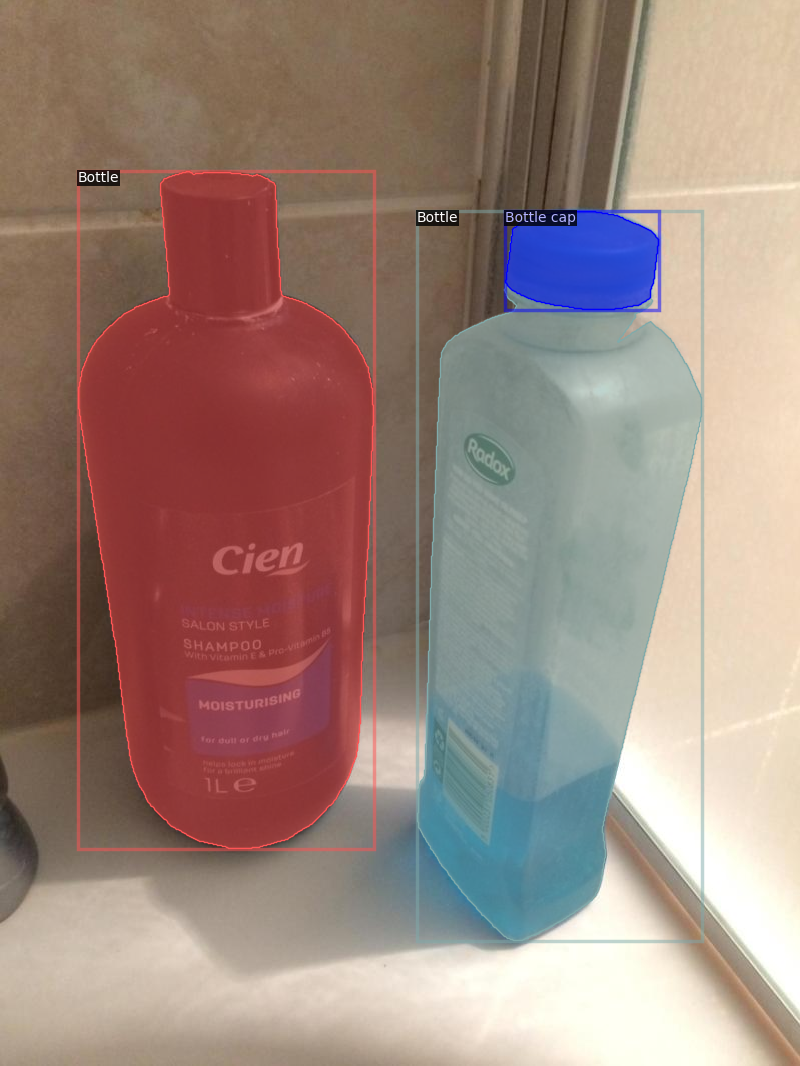

In [8]:
from detectron2.utils.visualizer import Visualizer
d2_visualizer = Visualizer(first_entry_img, MetadataCatalog.get("TACO_val"))
d2_visualizer = d2_visualizer.draw_dataset_dict(first_entry)
cv2_imshow(d2_visualizer.get_image())

In [9]:
train_cfg_loaded = get_cfg()
train_cfg_loaded.set_new_allowed(True)
train_cfg_loaded.merge_from_file("/content/TACO-expl/maskdino_config/taco_train_maskdino.yaml")
print(train_cfg_loaded.MODEL.BACKBONE.FREEZE_AT)
print(train_cfg_loaded.SOLVER.IMS_PER_BATCH)
print(train_cfg_loaded.INPUT.MIN_SIZE_TRAIN)
print(train_cfg_loaded.DATASETS.PRECOMPUTED_PROPOSAL_TOPK_TRAIN)
print(train_cfg_loaded.TEST.AUG.ENABLED)
print(train_cfg_loaded.INPUT.MASK_FORMAT)
print(train_cfg_loaded.Default_loading)
print(train_cfg_loaded.MODEL.MaskDINO.TEST.INSTANCE_ON) # it was previously set to true
print(train_cfg_loaded.MODEL.MaskDINO.TEST.SEMANTIC_ON) # it was previously set to false

0
2
(480, 512, 544, 576, 608, 640, 672, 704, 736, 768, 800)
100
False
polygon
False
False
True


In [10]:
from detectron2.modeling import build_model
from detectron2.checkpoint import DetectionCheckpointer

maskdino_model = build_model(train_cfg_loaded)
model_weights_path = "/content/MyDrive/MyDrive/MaskDINO_chkpts/model_final_freeze0.pth"
checkpointer = DetectionCheckpointer(maskdino_model)
checkpointer.load(model_weights_path)

criterion.weight_dict  {'loss_ce': 4.0, 'loss_mask': 5.0, 'loss_dice': 5.0, 'loss_bbox': 5.0, 'loss_giou': 2.0, 'loss_ce_interm': 4.0, 'loss_mask_interm': 5.0, 'loss_dice_interm': 5.0, 'loss_bbox_interm': 5.0, 'loss_giou_interm': 2.0, 'loss_ce_dn': 4.0, 'loss_mask_dn': 5.0, 'loss_dice_dn': 5.0, 'loss_bbox_dn': 5.0, 'loss_giou_dn': 2.0, 'loss_ce_interm_dn': 4.0, 'loss_mask_interm_dn': 5.0, 'loss_dice_interm_dn': 5.0, 'loss_bbox_interm_dn': 5.0, 'loss_giou_interm_dn': 2.0, 'loss_ce_0': 4.0, 'loss_mask_0': 5.0, 'loss_dice_0': 5.0, 'loss_bbox_0': 5.0, 'loss_giou_0': 2.0, 'loss_ce_interm_0': 4.0, 'loss_mask_interm_0': 5.0, 'loss_dice_interm_0': 5.0, 'loss_bbox_interm_0': 5.0, 'loss_giou_interm_0': 2.0, 'loss_ce_dn_0': 4.0, 'loss_mask_dn_0': 5.0, 'loss_dice_dn_0': 5.0, 'loss_bbox_dn_0': 5.0, 'loss_giou_dn_0': 2.0, 'loss_ce_interm_dn_0': 4.0, 'loss_mask_interm_dn_0': 5.0, 'loss_dice_interm_dn_0': 5.0, 'loss_bbox_interm_dn_0': 5.0, 'loss_giou_interm_dn_0': 2.0, 'loss_ce_1': 4.0, 'loss_mask_1':

{'trainer': {'iteration': 5747,
  'hooks': {'LRScheduler': {'base_lrs': [1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     1e-05,
     0.0001,
     0.0001,
     0.0001,
     0.0001,
     0.0001,
     0.0001,
     0.0001,
     0.0001,
     0.0001,
     0.0001,
     0.0001,
     0.0001,
     0.0001,
     0.0001,
     0.0001,
     0.0001,
     0.0001,
     0.0001,
     0.0001,
     0.0001,
     0.0001,
     0.0001,
     0.000

In [11]:
maskdino_model.eval()
with torch.no_grad():
  height, width = first_entry_img.shape[:2]
  image = torch.as_tensor(first_entry_img.astype("float32").transpose(2, 0, 1))
  image.to("cuda:0")
  inputs = {"image": image, "height": height, "width": width}
  predictions = maskdino_model([inputs])[0]

print(predictions)

/usr/local/lib/python3.10/dist-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


{'sem_seg': tensor([[[0.0032, 0.0032, 0.0032,  ..., 0.0099, 0.0102, 0.0102],
         [0.0032, 0.0032, 0.0032,  ..., 0.0099, 0.0102, 0.0102],
         [0.0033, 0.0033, 0.0033,  ..., 0.0101, 0.0105, 0.0105],
         ...,
         [0.0061, 0.0061, 0.0059,  ..., 0.0169, 0.0171, 0.0171],
         [0.0044, 0.0044, 0.0044,  ..., 0.0124, 0.0126, 0.0126],
         [0.0034, 0.0034, 0.0035,  ..., 0.0089, 0.0092, 0.0092]],

        [[0.0033, 0.0033, 0.0032,  ..., 0.0077, 0.0079, 0.0079],
         [0.0033, 0.0033, 0.0032,  ..., 0.0077, 0.0079, 0.0079],
         [0.0033, 0.0033, 0.0033,  ..., 0.0079, 0.0081, 0.0081],
         ...,
         [0.0048, 0.0048, 0.0047,  ..., 0.0199, 0.0204, 0.0204],
         [0.0038, 0.0038, 0.0038,  ..., 0.0142, 0.0145, 0.0145],
         [0.0035, 0.0035, 0.0035,  ..., 0.0101, 0.0103, 0.0103]],

        [[0.0020, 0.0020, 0.0020,  ..., 0.0049, 0.0051, 0.0051],
         [0.0020, 0.0020, 0.0020,  ..., 0.0049, 0.0051, 0.0051],
         [0.0020, 0.0020, 0.0020,  ..., 0.0051

In [12]:
def visualize_mask(single_mask):
  plt.figure(figsize=(10, 10))
  plt.imshow(single_mask)
  plt.colorbar()
  plt.axis('off')
  plt.show()

#visualize_mask(merged[0, 3, :, :])

torch.Size([10, 1066, 800])
['Bottle', 'Bottle cap', 'Can', 'Cigarette', 'Cup', 'Lid', 'Other', 'Plastic bag & wrapper', 'Pop tab', 'Straw']


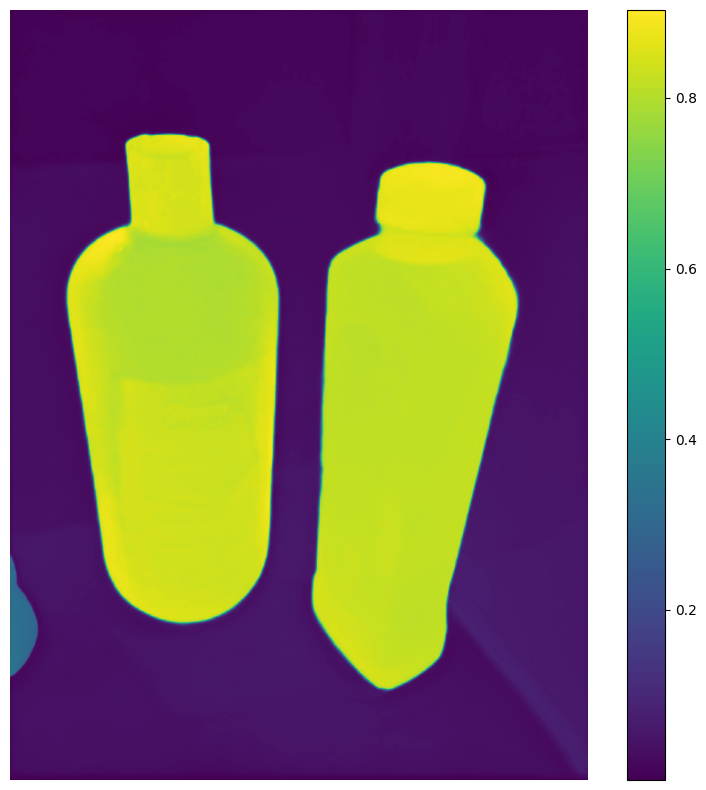

In [13]:
print(predictions["sem_seg"].shape)
print(classes)
maskdino_segm_map = predictions["sem_seg"].cpu()
visualize_mask(maskdino_segm_map[0, :, :])

In [102]:
# this is related to the instance detection output
print(predictions.keys())
print(predictions["instances"].get_fields().keys())
all_instance_masks = predictions["instances"].get_fields()["pred_masks"]
all_instance_scores = predictions["instances"].get_fields()["scores"]
all_instance_classes = predictions["instances"].get_fields()["pred_classes"]

th_score_idx = np.where(all_instance_scores.cpu() > 0.20)
th_masks = all_instance_masks[th_score_idx, :, :]
th_classes = all_instance_classes[th_score_idx]
n_classes = len(classes)
print(th_score_idx)
print(th_masks.shape)
print(th_classes)
print(n_classes)

dict_keys(['instances'])
dict_keys(['pred_masks', 'pred_boxes', 'scores', 'pred_classes'])
(array([ 0, 10, 20, 26, 31]),)
torch.Size([1, 5, 1066, 800])
tensor([0, 0, 0, 6, 1], device='cuda:0')
10


In [103]:
def merge_masks(th_masks, th_classes, n_classes):
  masks = th_masks.squeeze(0)
  height, width = masks.shape[1:]
  print(height, width)
  merged = np.zeros((n_classes, height, width))
  for idx, single_mask in enumerate(masks):
    merged[th_classes[idx]] = np.logical_or(merged[th_classes[idx]], single_mask)
  merged = np.expand_dims(merged, 0)
  return merged

merged = merge_masks(th_masks.cpu(), th_classes.cpu(), n_classes)
print(merged.shape)

1066 800
(1, 10, 1066, 800)


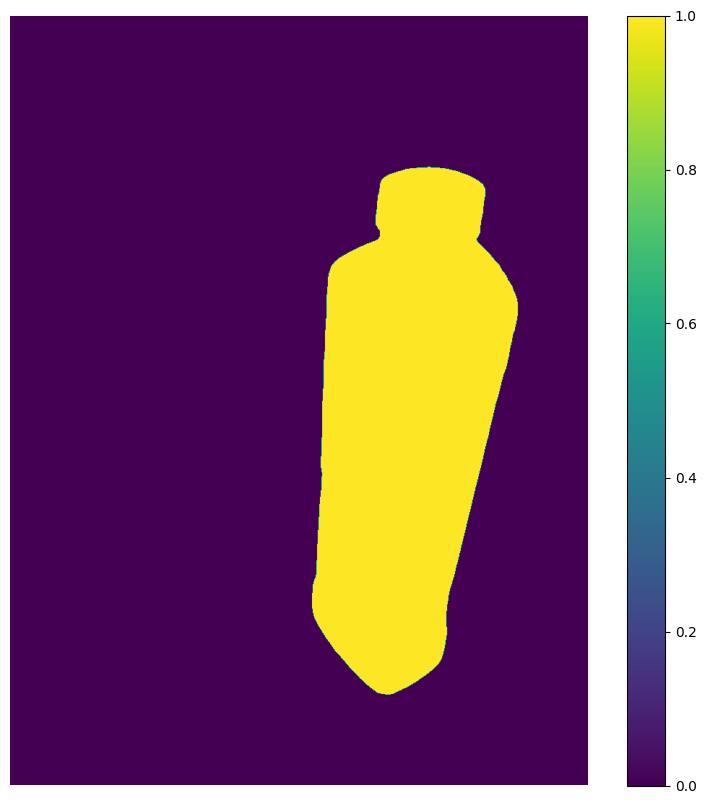

In [72]:
visualize_mask(th_masks[0, 0, :, :].cpu())

In [14]:
# Import the required packages

import torch
import argparse
import os
import cv2

from segmentation_models_pytorch import Unet

from skimage.io import imread,imsave
import numpy as np
import rasterio as rio
import geopandas as gpd
import matplotlib.pyplot as plt
import imageio

from geo_utils import *
from rasterio.features import shapes
from tqdm.notebook import tqdm
from color_map import cm_data

In [15]:
# load your model with pre-trained model weights

MODEL_PATH = './pretrained_model'
THRESH = 0.5
ALPHA = 0.85
SCALE = None


model = Unet(
        encoder_name = "tu-tf_efficientnet_b0",
        encoder_depth= 5,
        encoder_weights = None,
        decoder_use_batchnorm = True,
        decoder_channels = (256, 128, 64, 32, 16),
        decoder_attention_type = None,
        in_channels= 3,
        classes = 3,
        activation = 'sigmoid',
        aux_params = None,
    )

#model = load_model(model, MODEL_PATH)
model.load_state_dict(torch.load(os.path.join(MODEL_PATH, "best_model.pth"))["state_dict"])
model.cuda()

Unet(
  (encoder): TimmUniversalEncoder(
    (model): EfficientNetFeatures(
      (conv_stem): Conv2dSame(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (bn1): BatchNormAct2d(
        32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
        (drop): Identity()
        (act): SiLU(inplace=True)
      )
      (blocks): Sequential(
        (0): Sequential(
          (0): DepthwiseSeparableConv(
            (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (bn1): BatchNormAct2d(
              32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
              (drop): Identity()
              (act): SiLU(inplace=True)
            )
            (se): SqueezeExcite(
              (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
              (act1): SiLU(inplace=True)
              (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
              (gate): Sigmoid(

In [16]:
model.eval()
with torch.no_grad():
  height, width = first_entry_img.shape[:2]
  h_pad = (((((height // 32) + 1) * 32) - height) // 2) if (height % 32) != 0 else 0
  w_pad = (((((width // 32) + 1) * 32) - width) // 2) if (width % 32) != 0 else 0
  print(height, h_pad)
  print(width, w_pad)
  padded_image = cv2.copyMakeBorder(first_entry_img, h_pad, h_pad, w_pad, w_pad, cv2.BORDER_CONSTANT)
  print(padded_image.shape)
  image = torch.as_tensor(padded_image.astype("float32").transpose(2, 0, 1))
  image = image.unsqueeze(0)
  image = image.cuda()
  #inputs = {"image": image, "height": height, "width": width}
  print(image.get_device())
  unet_predictions = model(image)
print(unet_predictions)

1066 11
800 0
(1088, 800, 3)
0
tensor([[[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.0000e+00,
           1.0000e+00, 1.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.0000e+00,
           1.0000e+00, 1.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.0000e+00,
           1.0000e+00, 1.0000e+00],
          ...,
          [9.5891e-17, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
           1.0000e+00, 1.0000e+00],
          [3.2220e-21, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
           1.0000e+00, 1.0000e+00],
          [2.0161e-18, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
           1.0000e+00, 1.0000e+00]],

         [[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 2.0899e-36,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.0000e+00,
           1.0000e+00, 1.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.0000e+00,
           1.0000e+00, 1.0000e+00],
          ...,
          [0.0000e+00, 0.000

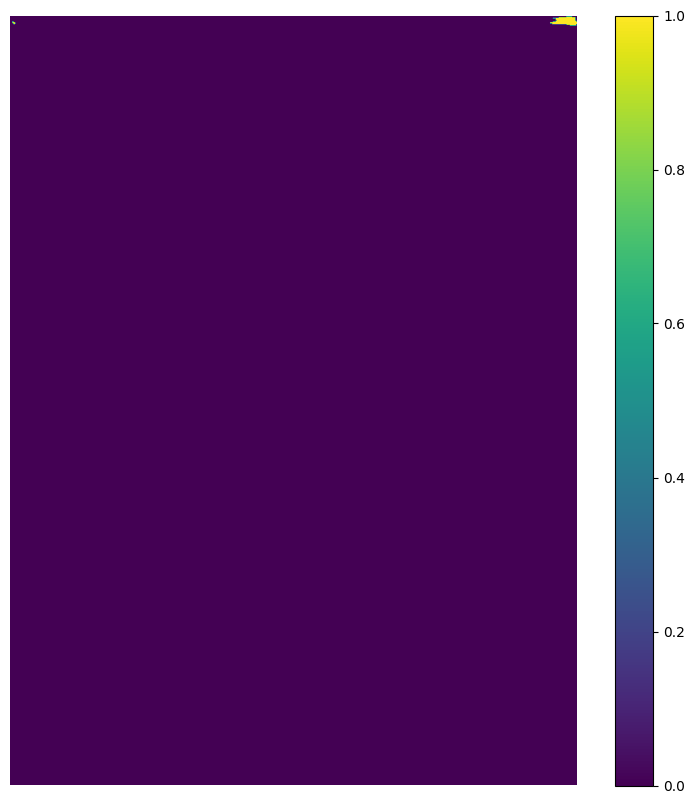

In [17]:
visualize_mask(unet_predictions[0, 2, :, :].cpu())

# The original numer of classes was 3, thus we have a tensor with 3 channels as output

In [18]:
unet_predictions.shape

torch.Size([1, 3, 1088, 800])

In [19]:
# Define the CAM-based Extensions classes
from PIL import Image
import numpy as np
import ttach as tta
import sys
import torch
import warnings
from skimage.io import imread
import matplotlib.pyplot as plt
from segmentation_models_pytorch import Unet
import argparse
import os
from typing import Callable, List
import cv2
import tqdm
from pytorch_grad_cam.utils.image import show_cam_on_image, preprocess_image
from skimage.segmentation import watershed
from skimage.measure import label
from pytorch_grad_cam.utils.svd_on_activations import get_2d_projection
from pytorch_grad_cam.utils.image import scale_cam_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.find_layers import replace_layer_recursive

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


# Grad-Cam Classes
class ActivationsAndGradients:
    """ Class for extracting activations and
    registering gradients from targetted intermediate layers """

    def __init__(self, model, target_layers, reshape_transform):
        self.model = model
        self.gradients = []
        self.activations = []
        self.reshape_transform = reshape_transform
        self.handles = []
        for target_layer in target_layers:
            self.handles.append(
                target_layer.register_forward_hook(self.save_activation))
            # Because of https://github.com/pytorch/pytorch/issues/61519,
            # we don't use backward hook to record gradients.
            self.handles.append(
                target_layer.register_forward_hook(self.save_gradient))

    def save_activation(self, module, input, output):
        activation = output
        if self.reshape_transform is not None:
            activation = self.reshape_transform(activation)
        self.activations.append(activation.cpu().detach())

    def save_gradient(self, module, input, output):
        if not hasattr(output, "requires_grad") or not output.requires_grad:
            # You can only register hooks on tensor requires grad.
            return

        # Gradients are computed in reverse order
        def _store_grad(grad):
            if self.reshape_transform is not None:
                grad = self.reshape_transform(grad)
            self.gradients = [grad.cpu().detach()] + self.gradients
            # self.gradients = [torch.mul(t, -1) for t in self.gradients]

        output.register_hook(_store_grad)

    def __call__(self, x):
        self.gradients = []
        self.activations = []
        return self.model(x)

    def release(self):
        for handle in self.handles:
            handle.remove()




class AblationLayer(torch.nn.Module):
    def __init__(self):
        super(AblationLayer, self).__init__()

    def objectiveness_mask_from_svd(self, activations, threshold=0.01):
        """ Experimental method to get a binary mask to compare if the activation is worth ablating.
            The idea is to apply the EigenCAM method by doing PCA on the activations.
            Then we create a binary mask by comparing to a low threshold.
            Areas that are masked out, are probably not interesting anyway.
        """

        projection = get_2d_projection(activations[None, :])[0, :]
        projection = np.abs(projection)
        projection = projection - projection.min()
        projection = projection / projection.max()
        projection = projection > threshold
        return projection

    def activations_to_be_ablated(
            self,
            activations,
            ratio_channels_to_ablate=1.0):
        """ Experimental method to get a binary mask to compare if the activation is worth ablating.
            Create a binary CAM mask with objectiveness_mask_from_svd.
            Score each Activation channel, by seeing how much of its values are inside the mask.
            Then keep the top channels.

        """
        if ratio_channels_to_ablate == 1.0:
            self.indices = np.int32(range(activations.shape[0]))
            return self.indices

        projection = self.objectiveness_mask_from_svd(activations)

        scores = []
        for channel in activations:
            normalized = np.abs(channel)
            normalized = normalized - normalized.min()
            normalized = normalized / np.max(normalized)
            score = (projection * normalized).sum() / normalized.sum()
            scores.append(score)
        scores = np.float32(scores)

        indices = list(np.argsort(scores))
        high_score_indices = indices[::-
                                     1][: int(len(indices) *
                                              ratio_channels_to_ablate)]
        low_score_indices = indices[: int(
            len(indices) * ratio_channels_to_ablate)]
        self.indices = np.int32(high_score_indices + low_score_indices)
        return self.indices

    def set_next_batch(
            self,
            input_batch_index,
            activations,
            num_channels_to_ablate):
        """ This creates the next batch of activations from the layer.
            Just take corresponding batch member from activations, and repeat it num_channels_to_ablate times.
        """
        self.activations = activations[input_batch_index, :, :, :].clone(
        ).unsqueeze(0).repeat(num_channels_to_ablate, 1, 1, 1)

    def __call__(self, x, test=None):
        output = self.activations
        for i in range(output.size(0)):
            # Commonly the minimum activation will be 0,
            # And then it makes sense to zero it out.
            # However depending on the architecture,
            # If the values can be negative, we use very negative values
            # to perform the ablation, deviating from the paper.
            if torch.min(output) == 0:
                output[i, self.indices[i], :] = 0
            else:
                ABLATION_VALUE = 1e7
                output[i, self.indices[i], :] = torch.min(
                    output) - ABLATION_VALUE

        return output




class GRADCAM_Extensions:
    def __init__(self, extension, model: torch.nn.Module, target_layers: List[torch.nn.Module], use_cuda: bool = False,
                 reshape_transform: Callable = None, compute_input_gradient: bool = False,
                 uses_gradients: bool = True) -> None:
        self.model = model.eval()
        self.target_layers = target_layers
        self.cuda = use_cuda
        if self.cuda:
            self.model = model.cuda()
        self.reshape_transform = reshape_transform
        self.compute_input_gradient = compute_input_gradient
        self.uses_gradients = uses_gradients
        self.activations_and_grads = ActivationsAndGradients(self.model, target_layers, reshape_transform)
        self.extension = extension

    def forward(self, input_tensor: torch.Tensor, targets: List[torch.nn.Module],
                eigen_smooth: bool = False) -> np.ndarray:

        # print('\n----------------------------------------Seg-Grad-Cam----------------------------------------------------\n')

        if self.cuda:
            input_tensor = input_tensor.cuda()
        if self.compute_input_gradient:
            input_tensor = torch.autograd.Variable(input_tensor, requires_grad=True)

        outputs = self.activations_and_grads(input_tensor)
        if targets is None:
            target_categories = np.argmax(outputs.cpu().data.numpy(), axis=-1)
            targets = [ClassifierOutputTarget(category) for category in target_categories]

        if self.uses_gradients:
            self.model.zero_grad()
            loss = sum([target(output) for target, output in zip(targets, outputs)])
            loss.backward(retain_graph=True)

        activations_list = [a.cpu().data.numpy() for a in self.activations_and_grads.activations]
        grads_list = [g.cpu().data.numpy() for g in self.activations_and_grads.gradients]
        target_size = input_tensor.size(-1), input_tensor.size(-2)
        # print('Activations list size: ', len(activations_list))
        # print('Gradients list size: ', len(grads_list))
        # print('Target layer size: ', len(self.target_layers))

        cam_per_target_layer = []
        # Loop over the saliency image from every layer
        for i in range(len(self.target_layers)):
            target_layer = self.target_layers[i]
            # print('\t\t\t-----------------------\n')
            # print('Target Layer ', i + 1, ': ', target_layer)
            layer_activations = None
            layer_grads = None
            if i < len(activations_list):
                layer_activations = activations_list[i]
            if i < len(grads_list):
                layer_grads = grads_list[i]


            if  self.extension == "grad_cam":
                weights = np.mean(layer_grads, axis=(2, 3))
                weighs_up = weights[:, :, None, None]
                weighted_activations = weights[:, :, None, None] * layer_activations
                if eigen_smooth:
                    cam = get_2d_projection(weighted_activations)
                    print("Cam image per layer size: ", cam.shape)
                else:
                    cam = weighted_activations.sum(axis=1)

            elif self.extension == "hires_cam":
                elementwise_activations = layer_grads * layer_activations
                if eigen_smooth:
                    cam = get_2d_projection(elementwise_activations)
                else:
                    cam = elementwise_activations.sum(axis=1)

            elif self.extension == "ew_cam":
                elementwise_activations = np.maximum(layer_grads * layer_activations, 0)
                if eigen_smooth:
                    cam = get_2d_projection(elementwise_activations)
                else:
                    cam = elementwise_activations.sum(axis=1)

            elif self.extension == "grad_cam_pp":
                grads_power_2 = layer_grads**2
                grads_power_3 = grads_power_2 * layer_grads
                # Equation 19 in https://arxiv.org/abs/1710.11063
                sum_activations = np.sum(layer_activations, axis=(2, 3))
                eps = 0.000001
                aij = grads_power_2 / (2 * grads_power_2 + sum_activations[:, :, None, None] * grads_power_3 + eps)
                # Now bring back the ReLU from eq.7 in the paper,
                # And zero out aijs where the activations are 0
                aij = np.where(layer_grads != 0, aij, 0)
                weights = np.maximum(layer_grads, 0) * aij
                weights = np.sum(weights, axis=(2, 3))
                weighted_activations = weights[:, :, None, None] * layer_activations
                if eigen_smooth:
                    cam = get_2d_projection(weighted_activations)
                    print("Cam image per layer size: ", cam.shape)
                else:
                    cam = weighted_activations.sum(axis=1)



            elif self.extension == "x_grad_cam":
                sum_activations = np.sum(layer_activations, axis=(2, 3))
                eps = 1e-7
                weights = layer_grads * layer_activations / \
                (sum_activations[:, :, None, None] + eps)
                weights = weights.sum(axis=(2, 3))
                weighted_activations = weights[:, :, None, None] * layer_activations
                if eigen_smooth:
                    cam = get_2d_projection(weighted_activations)
                    print("Cam image per layer size: ", cam.shape)
                else:
                    cam = weighted_activations.sum(axis=1)


            elif self.extension == "score_cam":
                with torch.no_grad():
                    upsample = torch.nn.UpsamplingBilinear2d(size=input_tensor.shape[-2:])
                    activation_tensor = torch.from_numpy(layer_activations)
                    if self.cuda:
                        activation_tensor = activation_tensor.cuda()
                    upsampled = upsample(activation_tensor)
                    maxs = upsampled.view(upsampled.size(0), upsampled.size(1), -1).max(dim=-1)[0]
                    mins = upsampled.view(upsampled.size(0), upsampled.size(1), -1).min(dim=-1)[0]
                    maxs, mins = maxs[:, :, None, None], mins[:, :, None, None]
                    upsampled = (upsampled - mins) / (maxs - mins)

                    input_tensors = input_tensor[:, None, :, :] * upsampled[:, :, None, :, :]
                    if hasattr(self, "batch_size"):
                        BATCH_SIZE = self.batch_size
                    else:
                        BATCH_SIZE = 8


                    scores = []
                    for target, tensor in zip(targets, input_tensors):
                        for i in tqdm.tqdm(range(0, tensor.size(0), BATCH_SIZE)):
                            batch = tensor[i: i + BATCH_SIZE, :]
                            outputs = [target(o).cpu().item() for o in self.model(batch)]
                            scores.extend(outputs)
                    scores = torch.Tensor(scores)
                    scores = scores.view(layer_activations.shape[0], layer_activations.shape[1])
                    weights = torch.nn.Softmax(dim=-1)(scores).numpy()

                weighted_activations = weights[:, :, None, None] * layer_activations
                if eigen_smooth:
                    cam = get_2d_projection(weighted_activations)
                    print("Cam image per layer size: ", cam.shape)
                else:
                    cam = weighted_activations.sum(axis=1)

            elif self.extension == "layer_cam":
                spatial_weighted_activations = np.maximum(layer_grads, 0) * layer_activations
                if eigen_smooth:
                    cam = get_2d_projection(spatial_weighted_activations)
                else:
                    cam = spatial_weighted_activations.sum(axis=1)


            elif self.extension == "eigen_cam":
                cam = get_2d_projection(layer_activations)

            elif self.extension == "eigen_grad_cam":
                cam = get_2d_projection(layer_grads * layer_activations)

            else:
                print("Unkown Extension. Please use one of the following: grad_cam - hires_cam - ew_cam -  grad_cam_pp - x_grad_cam - score_cam - layer_cam - eigen_cam -  eigen_grad_cam")



            cam = np.maximum(cam, 0)
            # print("Cam image  Max per layer size: ", cam.shape)
            scaled = scale_cam_image(cam, target_size)
            # print("Scaled Cam image per layer size: ", scaled.shape)
            cam_per_target_layer.append(scaled[:, None, :])

        # print("Cam image list size: ", len(cam_per_target_layer))
        cam_per_target_layer = np.concatenate(cam_per_target_layer, axis=1)
        # print("Cam image list Concat size: ", len(cam_per_target_layer))
        cam_per_target_layer = np.maximum(cam_per_target_layer, 0)
        # print("Cam image list (max) size: ", len(cam_per_target_layer))
        result = np.mean(cam_per_target_layer, axis=1) # old: mean
        # print("+++ Averaged CAM list size: ", result.shape)


        return scale_cam_image(result) # result

    def __call__(self, input_tensor: torch.Tensor, targets: List[torch.nn.Module] = None, aug_smooth: bool = False,
                 eigen_smooth: bool = False) -> np.ndarray:
        # Smooth the CAM result with test time augmentation
        if aug_smooth is True:
            transforms = tta.Compose(
                [
                    tta.HorizontalFlip(),
                    tta.Multiply(factors=[0.9, 1, 1.1]),
                ]
            )
            cams = []
            for transform in transforms:
                augmented_tensor = transform.augment_image(input_tensor)
                cam = self.forward(augmented_tensor, targets, eigen_smooth)
                # The ttach library expects a tensor of size BxCxHxW
                cam = cam[:, None, :, :]
                cam = torch.from_numpy(cam)
                cam = transform.deaugment_mask(cam)
                # Back to numpy float32, HxW
                cam = cam.numpy()
                cam = cam[:, 0, :, :]
                cams.append(cam)
            cam = np.mean(np.float32(cams), axis=0)
            return cam
        else:
            return self.forward(input_tensor, targets, eigen_smooth)

    def __del__(self):
        self.activations_and_grads.release()

    def __enter__(self):
        return self

    def __exit__(self, exc_type, exc_value, exc_tb):
        self.activations_and_grads.release()
        if isinstance(exc_value, IndexError):
            # Handle IndexError here...
            print(
                f"An exception occurred in CAM with block: {exc_type}. Message: {exc_value}")
            return True




class GRADCAMEXTENDED_AblationCAM:
    def __init__(self, model: torch.nn.Module, target_layers: List[torch.nn.Module], use_cuda: bool = False,
                 reshape_transform: Callable = None, compute_input_gradient: bool = False,
                 uses_gradients: bool = True,
                 ablation_layer: torch.nn.Module = AblationLayer(),
                 batch_size: int = 32,
                 ratio_channels_to_ablate: float = 1.0) -> None:
        self.model = model.eval()
        self.target_layers = target_layers
        self.cuda = use_cuda
        if self.cuda:
            self.model = model.cuda()
        self.reshape_transform = reshape_transform
        self.compute_input_gradient = compute_input_gradient
        self.uses_gradients = uses_gradients
        self.activations_and_grads = ActivationsAndGradients(self.model, target_layers, reshape_transform)
        self.batch_size = batch_size
        self.ablation_layer = ablation_layer
        self.ratio_channels_to_ablate = ratio_channels_to_ablate


    def save_activation(self, module, input, output) -> None:
        """ Helper function to save the raw activations from the target layer """
        self.activations = output

    def assemble_ablation_scores(self,
                                 new_scores: list,
                                 original_score: float,
                                 ablated_channels: np.ndarray,
                                 number_of_channels: int) -> np.ndarray:
        """ Take the value from the channels that were ablated,
            and just set the original score for the channels that were skipped """

        index = 0
        result = []
        sorted_indices = np.argsort(ablated_channels)
        ablated_channels = ablated_channels[sorted_indices]
        new_scores = np.float32(new_scores)[sorted_indices]

        for i in range(number_of_channels):
            if index < len(ablated_channels) and ablated_channels[index] == i:
                weight = new_scores[index]
                index = index + 1
            else:
                weight = original_score
            result.append(weight)

        return result


    def forward(self, input_tensor: torch.Tensor, targets: List[torch.nn.Module],
                eigen_smooth: bool = False) -> np.ndarray:

        # print('\n----------------------------------------Seg-Grad-Cam----------------------------------------------------\n')

        if self.cuda:
            input_tensor = input_tensor.cuda()
        if self.compute_input_gradient:
            input_tensor = torch.autograd.Variable(input_tensor, requires_grad=True)

        outputs = self.activations_and_grads(input_tensor)
        if targets is None:
            target_categories = np.argmax(outputs.cpu().data.numpy(), axis=-1)
            targets = [ClassifierOutputTarget(category) for category in target_categories]

        if self.uses_gradients:
            self.model.zero_grad()
            loss = sum([target(output) for target, output in zip(targets, outputs)])
            loss.backward(retain_graph=True)

        activations_list = [a.cpu().data.numpy() for a in self.activations_and_grads.activations]
        grads_list = [g.cpu().data.numpy() for g in self.activations_and_grads.gradients]
        target_size = input_tensor.size(-1), input_tensor.size(-2)
        # print('Activations list size: ', len(activations_list))
        # print('Gradients list size: ', len(grads_list))
        # print('Target layer size: ', len(self.target_layers))

        cam_per_target_layer = []
        # Loop over the saliency image from every layer
        for i in range(len(self.target_layers)):
            target_layer = self.target_layers[i]
            # print('\t\t\t-----------------------\n')
            # print('Target Layer ', i + 1, ': ', target_layer)
            layer_activations = None
            layer_grads = None
            if i < len(activations_list):
                layer_activations = activations_list[i]
            if i < len(grads_list):
                layer_grads = grads_list[i]


            # get weights
            # Do a forward pass, compute the target scores, and cache the
            # activations
            handle = target_layer.register_forward_hook(self.save_activation)
            with torch.no_grad():
                outputs = self.model(input_tensor)
                handle.remove()
                original_scores = np.float32(
                    [target(output).cpu().item() for target, output in zip(targets, outputs)])

            # Replace the layer with the ablation layer.
            # When we finish, we will replace it back, so the original model is
            # unchanged.
            ablation_layer = self.ablation_layer
            replace_layer_recursive(self.model, target_layer, ablation_layer)

            number_of_channels = layer_activations.shape[1]
            weights = []
            # This is a "gradient free" method, so we don't need gradients here.
            with torch.no_grad():
                # Loop over each of the batch images and ablate activations for it.
                for batch_index, (target, tensor) in enumerate(
                        zip(targets, input_tensor)):
                    new_scores = []
                    batch_tensor = tensor.repeat(self.batch_size, 1, 1, 1)

                    # Check which channels should be ablated. Normally this will be all channels,
                    # But we can also try to speed this up by using a low
                    # ratio_channels_to_ablate.
                    channels_to_ablate = ablation_layer.activations_to_be_ablated(
                        layer_activations[batch_index, :], self.ratio_channels_to_ablate)
                    number_channels_to_ablate = len(channels_to_ablate)

                    for i in tqdm.tqdm(range(0, number_channels_to_ablate, self.batch_size)):
                        if i + self.batch_size > number_channels_to_ablate:
                            batch_tensor = batch_tensor[:(number_channels_to_ablate - i)]

                        # Change the state of the ablation layer so it ablates the next channels.
                        # TBD: Move this into the ablation layer forward pass.
                        ablation_layer.set_next_batch(input_batch_index=batch_index,activations=self.activations,
                            num_channels_to_ablate=batch_tensor.size(0))


                        score = [target(o).cpu().item() for o in self.model(batch_tensor)]
                        new_scores.extend(score)

                        ablation_layer.indices = ablation_layer.indices[batch_tensor.size(0):]


                    new_scores = self.assemble_ablation_scores(new_scores,original_scores[batch_index], channels_to_ablate,
                        number_of_channels)
                    weights.extend(new_scores)

            weights = np.float32(weights)
            weights = weights.reshape(layer_activations.shape[:2])
            original_scores = original_scores[:, None]
            weights = (original_scores - weights) / original_scores

            # Replace the model back to the original state
            #-----------------------------------
            replace_layer_recursive(self.model, ablation_layer, target_layer)


            # Equation 3.1
            weighted_activations = weights[:, :, None, None] * layer_activations

            # Equation 3.2
            if eigen_smooth:
                cam = get_2d_projection(weighted_activations)
            else:
                cam = weighted_activations.sum(axis=1)

            cam = np.maximum(cam, 0)
            # print("Cam image  Max per layer size: ", cam.shape)
            scaled = scale_cam_image(cam, target_size)
            # print("Scaled Cam image per layer size: ", scaled.shape)
            cam_per_target_layer.append(scaled[:, None, :])

        # print("Cam image list size: ", len(cam_per_target_layer))
        cam_per_target_layer = np.concatenate(cam_per_target_layer, axis=1)
        # print("Cam image list Concat size: ", len(cam_per_target_layer))
        cam_per_target_layer = np.maximum(cam_per_target_layer, 0)
        # print("Cam image list (max) size: ", len(cam_per_target_layer))
        result = np.mean(cam_per_target_layer, axis=1) # old: mean
        # print("+++ Averaged CAM list size: ", result.shape)


        return scale_cam_image(result) # result

    def __call__(self, input_tensor: torch.Tensor, targets: List[torch.nn.Module] = None, aug_smooth: bool = False,
                 eigen_smooth: bool = False) -> np.ndarray:
        # Smooth the CAM result with test time augmentation
        if aug_smooth is True:
            transforms = tta.Compose(
                [
                    tta.HorizontalFlip(),
                    tta.Multiply(factors=[0.9, 1, 1.1]),
                ]
            )
            cams = []
            for transform in transforms:
                augmented_tensor = transform.augment_image(input_tensor)
                cam = self.forward(augmented_tensor, targets, eigen_smooth)
                # The ttach library expects a tensor of size BxCxHxW
                cam = cam[:, None, :, :]
                cam = torch.from_numpy(cam)
                cam = transform.deaugment_mask(cam)
                # Back to numpy float32, HxW
                cam = cam.numpy()
                cam = cam[:, 0, :, :]
                cams.append(cam)
            cam = np.mean(np.float32(cams), axis=0)
            return cam
        else:
            return self.forward(input_tensor, targets, eigen_smooth)

    def __del__(self):
        self.activations_and_grads.release()

    def __enter__(self):
        return self

    def __exit__(self, exc_type, exc_value, exc_tb):
        self.activations_and_grads.release()
        if isinstance(exc_value, IndexError):
            # Handle IndexError here...
            print(
                f"An exception occurred in CAM with block: {exc_type}. Message: {exc_value}")
            return True





from pytorch_grad_cam.utils.find_layers import find_layer_predicate_recursive
from pytorch_grad_cam.utils.image import scale_accross_batch_and_channels


class GRADCAMEXTENDED_FullGrad:
    def __init__(self, model: torch.nn.Module, target_layers: List[torch.nn.Module], use_cuda: bool = False,
                 reshape_transform: Callable = None, compute_input_gradient: bool = True,
                 uses_gradients: bool = True) -> None:

        if len(target_layers) > 0:
            print(
                "Warning: target_layers is ignored in FullGrad. All bias layers will be used instead")

        def layer_with_2D_bias(layer):
            bias_target_layers = [torch.nn.Conv2d, torch.nn.BatchNorm2d]
            if type(layer) in bias_target_layers and layer.bias is not None:
                return True
            return False
        target_layers = find_layer_predicate_recursive(model, layer_with_2D_bias)
        self.bias_data = [self.get_bias_data(layer).cpu().numpy() for layer in target_layers]




        self.model = model.eval()
        self.target_layers = target_layers
        self.cuda = use_cuda
        if self.cuda:
            self.model = model.cuda()
        self.reshape_transform = reshape_transform
        self.compute_input_gradient = compute_input_gradient
        self.uses_gradients = uses_gradients
        self.activations_and_grads = ActivationsAndGradients(self.model, target_layers, reshape_transform)


    def get_bias_data(self, layer):
        # Borrowed from official paper impl:
        # https://github.com/idiap/fullgrad-saliency/blob/master/saliency/tensor_extractor.py#L47
        if isinstance(layer, torch.nn.BatchNorm2d):
            bias = - (layer.running_mean * layer.weight
                      / torch.sqrt(layer.running_var + layer.eps)) + layer.bias
            return bias.data
        else:
            return layer.bias.data

    def forward(self, input_tensor: torch.Tensor, targets: List[torch.nn.Module],
                eigen_smooth: bool = False) -> np.ndarray:

        # print('\n----------------------------------------Seg-Grad-Cam----------------------------------------------------\n')

        if self.cuda:
            input_tensor = input_tensor.cuda()
        if self.compute_input_gradient:
            input_tensor = torch.autograd.Variable(input_tensor, requires_grad=True)

        outputs = self.activations_and_grads(input_tensor)
        if targets is None:
            target_categories = np.argmax(outputs.cpu().data.numpy(), axis=-1)
            targets = [ClassifierOutputTarget(category) for category in target_categories]

        if self.uses_gradients:
            self.model.zero_grad()
            loss = sum([target(output) for target, output in zip(targets, outputs)])
            loss.backward(retain_graph=True)

        #----remove------

        input_grad = input_tensor.grad.data.cpu().numpy()
        grads_list = [g.cpu().data.numpy() for g in self.activations_and_grads.gradients]
        cam_per_target_layer = []
        target_size = input_tensor.size(-1), input_tensor.size(-2)

        gradient_multiplied_input = input_grad * input_tensor.data.cpu().numpy()
        gradient_multiplied_input = np.abs(gradient_multiplied_input)
        gradient_multiplied_input = scale_accross_batch_and_channels(
            gradient_multiplied_input,
            target_size)
        cam_per_target_layer.append(gradient_multiplied_input)

        # Loop over the saliency image from every layer
        assert(len(self.bias_data) == len(grads_list))
        for bias, grads in zip(self.bias_data, grads_list):
            bias = bias[None, :, None, None]
            # In the paper they take the absolute value,
            # but possibily taking only the positive gradients will work
            # better.
            bias_grad = np.abs(bias * grads)
            result = scale_accross_batch_and_channels(
                bias_grad, target_size)
            result = np.sum(result, axis=1)
            cam_per_target_layer.append(result[:, None, :])
        cam_per_target_layer = np.concatenate(cam_per_target_layer, axis=1)
        if eigen_smooth:
            # Resize to a smaller image, since this method typically has a very large number of channels,
            # and then consumes a lot of memory
            cam_per_target_layer = scale_accross_batch_and_channels(
                cam_per_target_layer, (target_size[0] // 8, target_size[1] // 8))
            cam_per_target_layer = get_2d_projection(cam_per_target_layer)
            cam_per_target_layer = cam_per_target_layer[:, None, :, :]
            cam_per_target_layer = scale_accross_batch_and_channels(
                cam_per_target_layer,
                target_size)
        else:
            cam_per_target_layer = np.sum(
                cam_per_target_layer, axis=1)[:, None, :]


        result = np.sum(cam_per_target_layer, axis=1)
        return scale_cam_image(result) # result

    def __call__(self, input_tensor: torch.Tensor, targets: List[torch.nn.Module] = None, aug_smooth: bool = False,
                 eigen_smooth: bool = False) -> np.ndarray:
        # Smooth the CAM result with test time augmentation
        if aug_smooth is True:
            transforms = tta.Compose(
                [
                    tta.HorizontalFlip(),
                    tta.Multiply(factors=[0.9, 1, 1.1]),
                ]
            )
            cams = []
            for transform in transforms:
                augmented_tensor = transform.augment_image(input_tensor)
                cam = self.forward(augmented_tensor, targets, eigen_smooth)
                # The ttach library expects a tensor of size BxCxHxW
                cam = cam[:, None, :, :]
                cam = torch.from_numpy(cam)
                cam = transform.deaugment_mask(cam)
                # Back to numpy float32, HxW
                cam = cam.numpy()
                cam = cam[:, 0, :, :]
                cams.append(cam)
            cam = np.mean(np.float32(cams), axis=0)
            return cam
        else:
            return self.forward(input_tensor, targets, eigen_smooth)

    def __del__(self):
        self.activations_and_grads.release()

    def __enter__(self):
        return self

    def __exit__(self, exc_type, exc_value, exc_tb):
        self.activations_and_grads.release()
        if isinstance(exc_value, IndexError):
            # Handle IndexError here...
            print(
                f"An exception occurred in CAM with block: {exc_type}. Message: {exc_value}")
            return True

In [20]:
%cd "/content/GEOAI-ECRS2023/Extending CAM-based XAI methods for Remote Sensing Imagery Segmentation"

/content/GEOAI-ECRS2023/Extending CAM-based XAI methods for Remote Sensing Imagery Segmentation


b'2_566.png' b'2_566.png'
Testing Image:  1
Input Image Shape:  (512, 512, 3)
GT mask shape:  (512, 512)
predicated tensor shape:  torch.Size([3, 512, 512])
Model Target Confidence Score:  0.9124947
Model Target Entropy Score:  0.001429711
running seg-grad-cam...
SGC Target Confidence Score:  0.03352216  Entropy Score:  0.0011174403
running GradCam++ ...
SGC-PP Target Confidence Score:  0.037998185  Entropy Score:  0.0011307249
running XGradCam...
SGC-X Target Confidence Score:  0.033650313  Entropy Score:  0.0011165661
running ScoreCam...


100%|██████████| 32/32 [00:04<00:00,  7.28it/s]


SGC-Score Target Confidence Score:  0.757955  Entropy Score:  0.0019834277
running EigenCam...
SGC-eigen Target Confidence Score:  0.042779263  Entropy Score:  0.001307114
running AblationCAM...


100%|██████████| 8/8 [00:03<00:00,  2.35it/s]


SGC-Ablbation Target Confidence Score:  0.03355459  Entropy Score:  0.0011164816


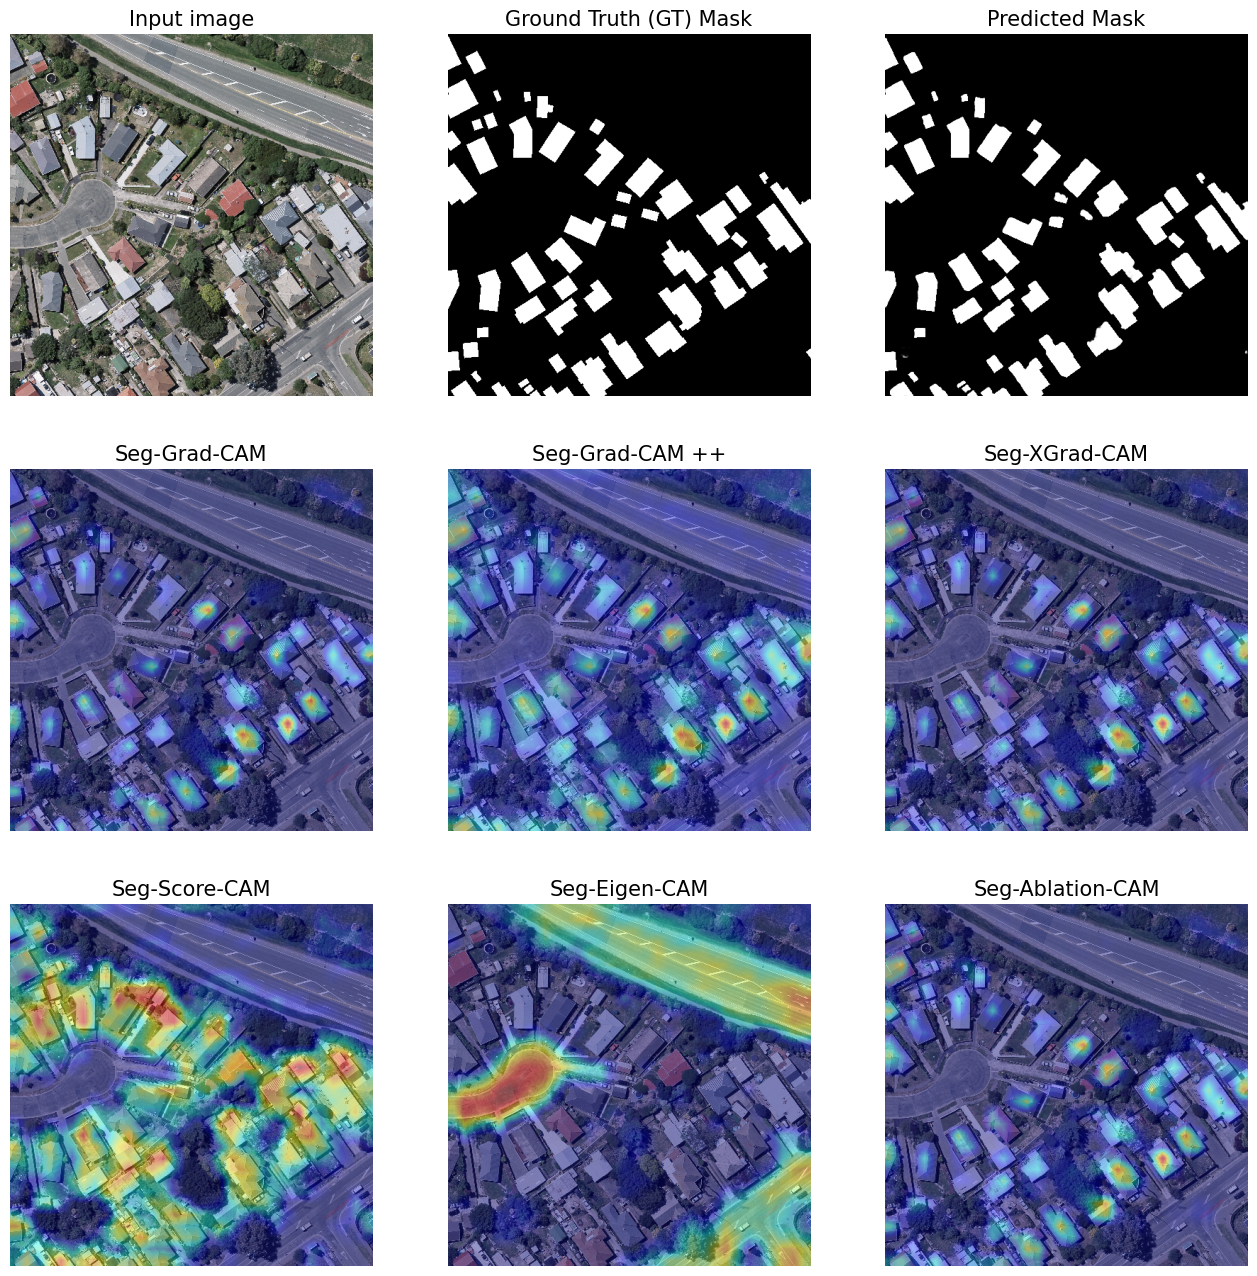

In [21]:
# Apply the adapted CAM-based Extensions on the considered dataset

class SemanticSegmentationTarget:
    def __init__(self, category, mask):
        self.category = category
        self.mask = torch.from_numpy(mask)
        if torch.cuda.is_available():
            self.mask = self.mask.cuda()

    def __call__(self, model_output):
        return (model_output[self.category, :, : ] * self.mask).sum()




def defaultScales():
    classes_cmap = plt.get_cmap('Spectral', 20)
    scale_fig = 2
    fonts = 15
    scatter_size = 330 * scale_fig
    return classes_cmap, scale_fig, fonts, scatter_size


def show_cam_image_whu(full_img_rgba, grayscale_cam_EX, image_weight):
    heatmap_sgc = cv2.applyColorMap(np.uint8(255 * grayscale_cam_EX), cv2.COLORMAP_JET)
    heatmap_sgc = cv2.cvtColor(heatmap_sgc, cv2.COLOR_BGR2RGB)
    heatmap_sgc = np.float32(heatmap_sgc) / 255
    if full_img.shape[-1]==4:
        heatmap_sgc = cv2.cvtColor(heatmap_sgc,cv2.COLOR_RGB2RGBA)
    Exmap_sgc = (1 - image_weight) * heatmap_sgc + image_weight * full_img_rgba
    Exmap_sgc = Exmap_sgc / np.max(Exmap_sgc)
    Exmap_sgc = np.uint8(255 * Exmap_sgc)

    return Exmap_sgc, heatmap_sgc


def prob_2_entropy(prob):
    """ convert probabilistic prediction maps to weighted self-information maps
    """
    n, c, h, w = prob.size()
    return -torch.mul(prob, torch.log2(prob + 1e-30)) / np.log2(c)

def XAI_EVAL_M2(thres,grayscale_cam_EX, full_img_gt, full_img, model, rrp_info,target_category):
    im_bw_sgc = cv2.threshold(grayscale_cam_EX, thres, 1, cv2.THRESH_BINARY)[1]
    union_gt_sgc = np.ma.mask_or(full_img_gt,im_bw_sgc)

    E_sgc = full_img * union_gt_sgc[..., None]
    x_sgc = totensor(E_sgc)
    x_sgc = x_sgc.cuda()
    with torch.no_grad():
        y_pred_sgc = model(x_sgc)
        y_pred_sgc = unpad_resize(y_pred_sgc,rrp_info)

    mask_tensor_sgc = y_pred_sgc[0,...]
    mask_sgc = y_pred_sgc[0,...].cpu().numpy().transpose(1,2,0)
    target_mask_f = np.float32(mask_sgc[:,:,target_category]) * full_img_gt
    target_Confidence_score = target_mask_f[np.nonzero(target_mask_f)]
    target_Confidence_score_sgc = np.mean(target_Confidence_score)

    logist_softmax_entropy_sgc = prob_2_entropy(y_pred_sgc)
    target_entropy_mask_sgc = logist_softmax_entropy_sgc[0, :, :, :].detach().cpu().numpy().transpose(1,2,0)
    target_entropy_mask_class_sgc = target_entropy_mask_sgc[:,:,target_category] * full_img_gt
    target_entropy_mask_class_sgc_sc = (np.mean(target_entropy_mask_class_sgc))
    return target_Confidence_score_sgc, target_entropy_mask_class_sgc_sc, im_bw_sgc,E_sgc



images_dir = r'./dataset/images'
gt_dir = r'./dataset/gt'





ticks = np.linspace(0, 1, 6, endpoint=True)
classes_cmap, scale_fig, fonts, scatter_size = defaultScales()




decoder_idx = 1
n_xai = 6
n_imgs = 1
target_layers =  [model.decoder.blocks[decoder_idx - 1]]
target_category = 0
XAI_method = ["grad_cam", "hires_cam", "ew_cam", "grad_cam_pp", "x_grad_cam","score_cam", "layer_cam", "eigen_cam", "eigen_grad_cam"]

image_weight = 0.006

directory_images = os.fsencode(images_dir)
directory_gt = os.fsencode(gt_dir)


number_testing_images = 0

Model_Seg_Score = np.zeros((n_imgs))
Model_Seg_Entropy = np.zeros((n_imgs))

Seg_Score = np.zeros((n_xai, n_imgs))
Seg_Entropy = np.zeros((n_xai, n_imgs))
counter = 0


for (file_img, file_gt) in zip(os.listdir(directory_images), os.listdir(directory_gt) ):

    print(file_img, file_gt)
    if file_img == file_gt:
        number_testing_images = number_testing_images + 1
        print("Testing Image: ", number_testing_images)
        filename = os.fsdecode(file_img)
        filename_gt = os.fsdecode(file_gt)
        if filename.endswith(".png") and filename_gt.endswith(".png"):
            raster_file = rio.open(f'{images_dir}/{filename}')
            full_img = raster_file.read().transpose(1,2,0)
            full_img,rrp_info = ratio_resize_pad(full_img, ratio = None)
            full_img_rgba = full_img
            print("Input Image Shape: ", full_img.shape)
            if full_img.shape[-1]==4:full_img = cv2.cvtColor(full_img,cv2.COLOR_RGBA2RGB) #WHU images are RGBA
            # read gt mask
            raster_file_gt = rio.open(f'{gt_dir}/{filename_gt}')
            full_img_gt = raster_file_gt.read().transpose(1,2,0)
            full_img_gt,rrp_info_gt = ratio_resize_pad(full_img_gt, ratio = None)
            full_img_gt = np.float32(full_img_gt) / np.max(full_img_gt)
            print("GT mask shape: ", full_img_gt.shape)


            full_img = normalize(full_img)
            x = totensor(full_img)
            x = x.cuda()

            with torch.no_grad():
                y_pred = model(x)
                y_pred = unpad_resize(y_pred, rrp_info)

            mask_tensor = y_pred[0,...] # here we get the output masks
            print('predicated tensor shape: ', mask_tensor.shape)
            mask = y_pred[0,...].cpu().numpy().transpose(1,2,0)

            target_mask_float = np.float32(mask[:,:,target_category]) * full_img_gt # here we get the mask relative to the target class
            target_Confidence_score = target_mask_float[np.nonzero(target_mask_float)]
            target_Confidence_score = np.mean(target_Confidence_score)
            print("Model Target Confidence Score: ", target_Confidence_score)

            logist_softmax_entropy = prob_2_entropy(y_pred)
            target_entropy_mask = logist_softmax_entropy[0, :, :, :].detach().cpu().numpy().transpose(1,2,0)
            target_entropy_mask_class = target_entropy_mask[:,:,target_category] * full_img_gt
            model_entropy = np.mean(target_entropy_mask_class)
            print("Model Target Entropy Score: ", model_entropy )


            targets = [SemanticSegmentationTarget(target_category, target_mask_float)]

            nan_condition = np.count_nonzero(target_mask_float)
            if nan_condition != 0:

                print('running seg-grad-cam...')
                with GRADCAM_Extensions(extension = XAI_method[0], model=model, target_layers=target_layers, use_cuda=torch.cuda.is_available()) as cam:
                    grayscale_cam_EX = cam(input_tensor=x, targets=targets)[0, :]
                    [Exmap_sgc, heatmap_sgc_rgba] = show_cam_image_whu(full_img_rgba, grayscale_cam_EX, image_weight)
                    [confidence_sgc_M2, entropy_sgc_M2, bw_sgc,E_sgc] = XAI_EVAL_M2(0.4, grayscale_cam_EX, full_img_gt, full_img, model, rrp_info, target_category)
                    print("SGC Target Confidence Score: ", confidence_sgc_M2," Entropy Score: ", entropy_sgc_M2)

                print('running GradCam++ ...')
                with GRADCAM_Extensions(extension = XAI_method[3], model=model, target_layers=target_layers, use_cuda=torch.cuda.is_available()) as campp:
                    grayscale_cam_EX_Plusplus = campp(input_tensor=x, targets=targets)[0, :]
                    [Exmap_sgcpp, heatmap_sgcpp_rgba] = show_cam_image_whu(full_img_rgba, grayscale_cam_EX_Plusplus, image_weight)
                    [confidence_sgcpp_M2, entropy_sgcpp_M2, bw_sgcpp,E_sgcpp] = XAI_EVAL_M2(0.4,grayscale_cam_EX_Plusplus, full_img_gt, full_img, model, rrp_info, target_category)
                    print("SGC-PP Target Confidence Score: ", confidence_sgcpp_M2," Entropy Score: ", entropy_sgcpp_M2)

                print('running XGradCam...')
                with GRADCAM_Extensions(extension = XAI_method[4], model=model, target_layers=target_layers, use_cuda=torch.cuda.is_available()) as xcam:
                    grayscale_cam_EX_X = xcam(input_tensor=x, targets=targets)[0, :]
                    [Exmap_Xsgc, heatmap_Xsgc_rgba] = show_cam_image_whu(full_img_rgba, grayscale_cam_EX_X, image_weight)
                    [confidence_Xsgc_M2, entropy_Xsgc_M2, bw_sgcx,E_sgcx] = XAI_EVAL_M2(0.4,grayscale_cam_EX_X, full_img_gt, full_img, model, rrp_info, target_category)
                    print("SGC-X Target Confidence Score: ", confidence_Xsgc_M2," Entropy Score: ", entropy_Xsgc_M2)


                print('running ScoreCam...')
                with GRADCAM_Extensions(extension = XAI_method[5], model=model, target_layers=target_layers, use_cuda=torch.cuda.is_available()) as scorecam:
                    grayscale_cam_EX_Score = scorecam(input_tensor=x, targets=targets)[0, :]
                    [Exmap_scoresgc, heatmap_scoresgc_rgba] = show_cam_image_whu(full_img_rgba, grayscale_cam_EX_Score, image_weight)
                    [confidence_ssgc_M2, entropy_ssgc_M2, bw_sgcs,E_sgcs] = XAI_EVAL_M2(0.4,grayscale_cam_EX_Score, full_img_gt, full_img, model, rrp_info, target_category)
                    print("SGC-Score Target Confidence Score: ", confidence_ssgc_M2," Entropy Score: ", entropy_ssgc_M2)


                print('running EigenCam...')
                with GRADCAM_Extensions(extension = XAI_method[7], model=model, target_layers=target_layers, use_cuda=torch.cuda.is_available()) as ecam:
                    grayscale_cam_EX_eigen = ecam(input_tensor=x, targets=targets)[0, :]
                    [Exmap_eigensgc, heatmap_eigensgc_rgba] = show_cam_image_whu(full_img_rgba, grayscale_cam_EX_eigen, image_weight)
                    [confidence_esgc_M2, entropy_esgc_M2, bw_sgce, E_sgce] = XAI_EVAL_M2(0.4,grayscale_cam_EX_eigen, full_img_gt, full_img, model, rrp_info,target_category)
                    print("SGC-eigen Target Confidence Score: ", confidence_esgc_M2," Entropy Score: ", entropy_esgc_M2)



                print('running AblationCAM...')
                with GRADCAMEXTENDED_AblationCAM(model=model, target_layers=target_layers, use_cuda=torch.cuda.is_available()) as ablcam:
                    grayscale_cam_EX_abl = ablcam(input_tensor=x, targets=targets)[0, :]
                    [Exmap_ablsgc, heatmap_ablsgc_rgba] = show_cam_image_whu(full_img_rgba, grayscale_cam_EX_abl, image_weight)
                    [confidence_asgc_M2, entropy_asgc_M2, bw_sgca, E_sgca] = XAI_EVAL_M2(0.4,grayscale_cam_EX_abl, full_img_gt, full_img, model, rrp_info, target_category)
                    print("SGC-Ablbation Target Confidence Score: ", confidence_asgc_M2," Entropy Score: ", entropy_asgc_M2)



                Model_Seg_Score[counter] = target_Confidence_score
                Model_Seg_Entropy[counter] = model_entropy

                Seg_Score[0,counter] = confidence_sgc_M2
                Seg_Score[1,counter] = confidence_sgcpp_M2
                Seg_Score[2,counter] = confidence_Xsgc_M2
                Seg_Score[3,counter] = confidence_ssgc_M2
                Seg_Score[4,counter] = confidence_esgc_M2
                Seg_Score[5,counter] = confidence_asgc_M2

                Seg_Entropy[0,counter] = entropy_sgc_M2
                Seg_Entropy[1,counter] = entropy_sgcpp_M2
                Seg_Entropy[2,counter] = entropy_Xsgc_M2
                Seg_Entropy[3,counter] = entropy_ssgc_M2
                Seg_Entropy[4,counter] = entropy_esgc_M2
                Seg_Entropy[5,counter] = entropy_asgc_M2
                counter = counter + 1

                if(number_testing_images == 2):
                    break



                fig = plt.figure(figsize=(8 * scale_fig, 8 * scale_fig))

                plt.subplot(3,3,1)
                plt.axis('off')
                plt.imshow(full_img_rgba)
                plt.title('Input image', fontsize=fonts)

                plt.subplot(3,3,2)
                plt.axis('off')
                plt.imshow(full_img_gt, cmap='gray', vmin=0, vmax=1)
                plt.title('Ground Truth (GT) Mask', fontsize=fonts)

                plt.subplot(3,3,3)
                plt.axis('off')
                plt.imshow(target_mask_float,  cmap='gray', vmin=0, vmax=1)
                plt.title('Predicted Mask', fontsize=fonts)

                plt.subplot(3,3,4)
                plt.axis('off')
                plt.imshow(Exmap_sgc)
                plt.title('Seg-Grad-CAM', fontsize=fonts)

                plt.subplot(3,3,5)
                plt.axis('off')
                plt.imshow(Exmap_sgcpp)
                plt.title('Seg-Grad-CAM ++', fontsize=fonts)

                plt.subplot(3,3,6)
                plt.axis('off')
                plt.imshow(Exmap_Xsgc)
                plt.title('Seg-XGrad-CAM', fontsize=fonts)

                plt.subplot(3,3,7)
                plt.axis('off')
                plt.imshow(Exmap_scoresgc)
                plt.title('Seg-Score-CAM', fontsize=fonts)

                plt.subplot(3,3,8)
                plt.axis('off')
                plt.imshow(Exmap_eigensgc)
                plt.title('Seg-Eigen-CAM', fontsize=fonts)


                plt.subplot(3,3,9)
                plt.axis('off')
                plt.imshow(Exmap_ablsgc)
                plt.title('Seg-Ablation-CAM', fontsize=fonts)

                # Save the full figure...
                fig.savefig('./results/SegGradCam_Extensions_{}_{}.png'.format(filename,decoder_idx), bbox_inches='tight', pad_inches=0)




In [22]:
"""
#print(maskdino_model.named_parameters())
target_layers = []
for name, p in maskdino_model.named_parameters():
  #print(name)
  if "sem_seg_head.predictor.decoder.layers" in name:
    target_layers.append(p)

print(target_layers)
"""

#print(maskdino_model.parameters)
help(maskdino_model.get_submodule)
target_layers_1 = maskdino_model.get_submodule("sem_seg_head.predictor") #.pixel_decoder.decoder.TransformerDecoder
target_layers_2 = [maskdino_model.get_submodule("sem_seg_head.predictor.decoder")]
print(target_layers_2)

Help on method get_submodule in module torch.nn.modules.module:

get_submodule(target: str) -> 'Module' method of maskdino.MaskDINO instance
    Return the submodule given by ``target`` if it exists, otherwise throw an error.
    
    For example, let's say you have an ``nn.Module`` ``A`` that
    looks like this:
    
    .. code-block:: text
    
        A(
            (net_b): Module(
                (net_c): Module(
                    (conv): Conv2d(16, 33, kernel_size=(3, 3), stride=(2, 2))
                )
                (linear): Linear(in_features=100, out_features=200, bias=True)
            )
        )
    
    (The diagram shows an ``nn.Module`` ``A``. ``A`` has a nested
    submodule ``net_b``, which itself has two submodules ``net_c``
    and ``linear``. ``net_c`` then has a submodule ``conv``.)
    
    To check whether or not we have the ``linear`` submodule, we
    would call ``get_submodule("net_b.linear")``. To check whether
    we have the ``conv`` submodule, we w

In [23]:
input_image = totensor(first_entry_img).cuda()
target_preds = predictions

print('running seg-grad-cam...')
with GRADCAM_Extensions(extension = XAI_method[0], model=maskdino_model, target_layers = target_layers_2, use_cuda=torch.cuda.is_available()) as cam:
    grayscale_cam_EX = cam(input_tensor=x, targets=target_preds)[0, :]
    #[Exmap_sgc, heatmap_sgc_rgba] = show_cam_image_whu(full_img_rgba, grayscale_cam_EX, image_weight)
    #[confidence_sgc_M2, entropy_sgc_M2, bw_sgc,E_sgc] = XAI_EVAL_M2(0.4, grayscale_cam_EX, full_img_gt, full_img, model, rrp_info, target_category)
    #print("SGC Target Confidence Score: ", confidence_sgc_M2," Entropy Score: ", entropy_sgc_M2)

print(grayscale_cam_EX)

running seg-grad-cam...
An exception occurred in CAM with block: <class 'IndexError'>. Message: too many indices for tensor of dimension 3
[[0.03393178 0.03393178 0.03393178 ... 0.         0.         0.        ]
 [0.03393178 0.03393178 0.03393178 ... 0.         0.         0.        ]
 [0.03393178 0.03393178 0.03393178 ... 0.         0.         0.        ]
 ...
 [0.23203552 0.23203552 0.23203552 ... 0.         0.         0.        ]
 [0.23203552 0.23203552 0.23203552 ... 0.         0.         0.        ]
 [0.23203552 0.23203552 0.23203552 ... 0.         0.         0.        ]]


In [24]:
grayscale_cam_EX.shape

(512, 512)